# Zara Sales EDA - Notebook V3

Comprehensive exploratory data analysis of Zara clothing sales data with visualizations and insights.

## 1. Data Loading & Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('Zara_sales_EDA.csv', delimiter=';')
df.head()

,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,url,name,description,price,currency,terms,section,season,material,origin
0,185102,Aisle,Yes,clothing,Yes,1243,Zara,https://www.zara.com/us/en/basic-puffer-jacket...,BASIC PUFFER JACKET,Puffer jacket made of tear-resistant ripstop f...,78.99,USD,jackets,MAN,Winter,Polyester,Brazil
1,188771,Aisle,Yes,clothing,No,1429,Zara,https://www.zara.com/us/en/tuxedo-jacket-p0889...,TUXEDO JACKET,Straight fit blazer. Pointed lapel collar and ...,14.99,USD,jackets,MAN,Autumn,Cotton,Turkey
2,180176,End-cap,Yes,clothing,Yes,1168,Zara,https://www.zara.com/us/en/slim-fit-suit-jacke...,SLIM FIT SUIT JACKET,Slim fit jacket. Notched lapel collar. Long sl...,71.95,USD,jackets,WOMAN,Autumn,Polyester,Morocco
3,112917,Aisle,Yes,clothing,No,1348,Zara,https://www.zara.com/us/en/stretch-suit-jacket...,STRETCH SUIT JACKET,Slim fit jacket made of viscose blend fabric. ...,30.99,USD,jackets,MAN,Spring,Polyester,China
4,192936,End-cap,Yes,clothing,Yes,1602,Zara,https://www.zara.com/us/en/double-faced-jacket...,DOUBLE FACED JACKET,Jacket made of faux leather faux shearling wit...,22.99,USD,jackets,WOMAN,Winter,Wool Blend,China


## 2. Data Cleaning & Overview

**Data Quality:**
- No duplicated rows
- 20,252 rows × 17 columns
- All necessary data types confirmed

**Categorical features for analysis:** section, season, material
**Numerical features:** sales_volume, price

In [3]:
# Verify data quality
print(f"Duplicated rows: {df.duplicated().sum()}")
print(f"Shape: {df.shape}")
print(f"\nData types:\n{df.dtypes}")

Duplicated rows: 0
Shape: (20252, 17)

Data types:
Product ID            int64
Product Position     object
Promotion            object
Product Category     object
Seasonal             object
Sales Volume          int64
brand                object
url                  object
name                 object
description          object
price               float64
currency             object
terms                object
section              object
season               object
material             object
origin               object
dtype: object


In [4]:
# Clean column names
def clean_columns(df: pd.DataFrame):
    new_cols = [str.lower(str.replace(col, ' ', '_')) for col in df.columns]
    for idx, col in enumerate(df.columns):
        df = df.rename(columns={col: new_cols[idx]})
    return df

df = clean_columns(df)
df.head(5)

,product_id,product_position,promotion,product_category,seasonal,sales_volume,brand,url,name,description,price,currency,terms,section,season,material,origin
0,185102,Aisle,Yes,clothing,Yes,1243,Zara,https://www.zara.com/us/en/basic-puffer-jacket...,BASIC PUFFER JACKET,Puffer jacket made of tear-resistant ripstop f...,78.99,USD,jackets,MAN,Winter,Polyester,Brazil
1,188771,Aisle,Yes,clothing,No,1429,Zara,https://www.zara.com/us/en/tuxedo-jacket-p0889...,TUXEDO JACKET,Straight fit blazer. Pointed lapel collar and ...,14.99,USD,jackets,MAN,Autumn,Cotton,Turkey
2,180176,End-cap,Yes,clothing,Yes,1168,Zara,https://www.zara.com/us/en/slim-fit-suit-jacke...,SLIM FIT SUIT JACKET,Slim fit jacket. Notched lapel collar. Long sl...,71.95,USD,jackets,WOMAN,Autumn,Polyester,Morocco
3,112917,Aisle,Yes,clothing,No,1348,Zara,https://www.zara.com/us/en/stretch-suit-jacket...,STRETCH SUIT JACKET,Slim fit jacket made of viscose blend fabric. ...,30.99,USD,jackets,MAN,Spring,Polyester,China
4,192936,End-cap,Yes,clothing,Yes,1602,Zara,https://www.zara.com/us/en/double-faced-jacket...,DOUBLE FACED JACKET,Jacket made of faux leather faux shearling wit...,22.99,USD,jackets,WOMAN,Winter,Wool Blend,China


In [5]:
# Summary statistics
df.describe()

,product_id,sales_volume,price
count,20252.000000,20252.000000,20252.000000
mean,208931.432303,1097.400454,41.949061
std,8961.076507,298.234609,23.380960
min,110075.000000,518.000000,12.000000
25%,204442.750000,849.000000,23.950000
50%,209505.500000,990.000000,35.950000
75%,214568.250000,1364.250000,53.950000
max,219631.000000,1940.000000,134.990000


## 3. Price & Sales Volume Distribution

**Key Findings:**
- Sales volume: Mean 1,097 (median 990), ranges 518-1,940
- Price: Mean $41.95 (median $35.95), ranges $12-$134.99
- Both variables show relatively uniform distributions with slight right skew

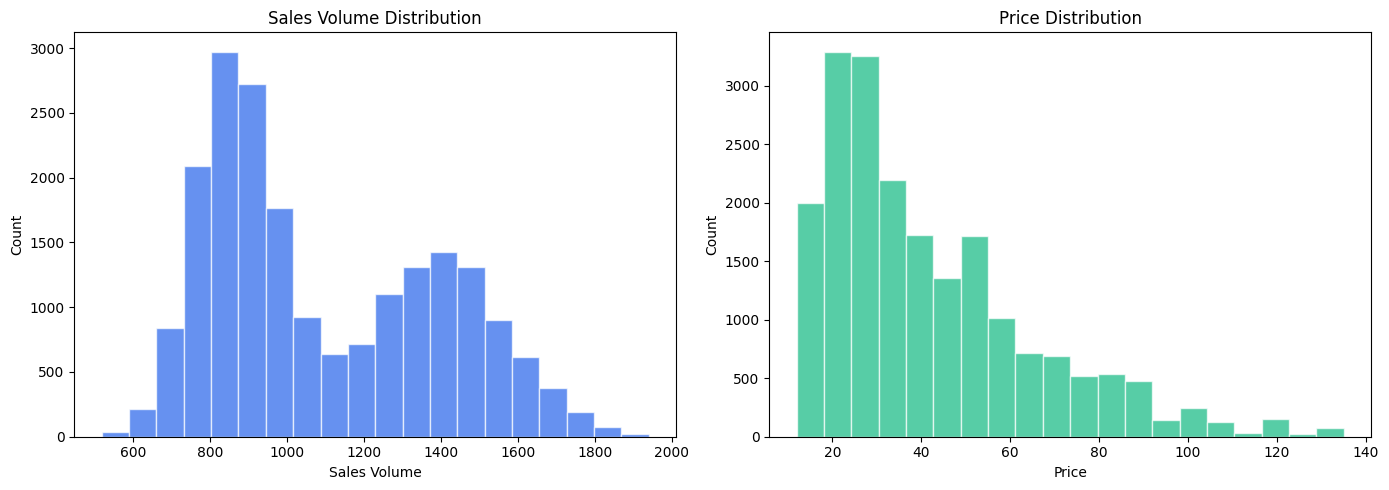

In [6]:
# Distribution of numerical features
num_cols = ["sales_volume", "price"]
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

colors = ['#2563eb', '#10b981']

for i, col in enumerate(num_cols):
    ax = axes[i]
    df[col].plot.hist(bins=20, ax=ax, alpha=0.7, color=colors[i], edgecolor='white')
    ax.set_xlabel(col.replace("_", " ").title())
    ax.set_ylabel("Count")
    ax.set_title(f"{col.replace('_', ' ').title()} Distribution")

plt.tight_layout()
plt.show()

## 4. Price vs Sales Volume Correlation

**Key Finding:**
- Strong **negative correlation**: Higher price → Lower sales volume
- Suggests price sensitivity in customer behavior
- Premium products have lower demand

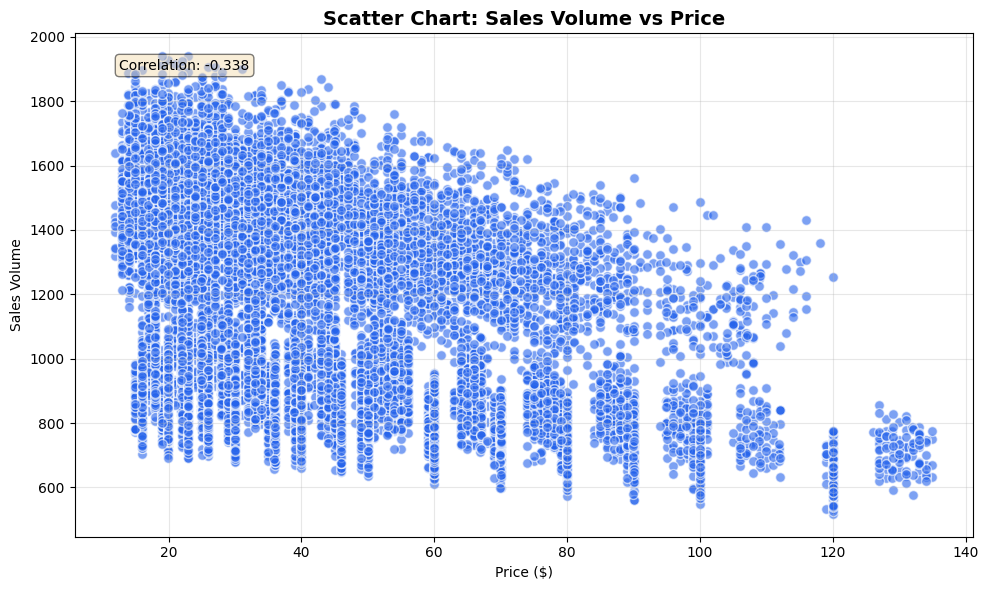

In [ ]:
# Scatter chart: Price vs Sales Volume
fig, ax = plt.subplots(figsize=(10, 6))
df.plot.scatter(x="price", y="sales_volume", ax=ax, 
                color='#2563eb', alpha=0.6, s=50, edgecolor='white')
ax.set_title("Scatter Chart: Sales Volume vs Price", fontsize=14, fontweight='bold')
ax.set_xlabel("Price ($)")
ax.set_ylabel("Sales Volume")
ax.grid(True, alpha=0.3)

# Calculate correlation
corr = df['price'].corr(df['sales_volume'])
ax.text(0.05, 0.95, f'Correlation: {corr:.3f}', 
        transform=ax.transAxes, fontsize=10, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

# Color by season 
# More dimensions: add color, size, shape

## 5. Sales by Season & Clothing Type

**Key Finding:**
- Different clothing types have varying seasonal sales patterns
- Stacked bar chart shows total volume distribution across seasons
- Winter and Autumn typically have higher sales volumes

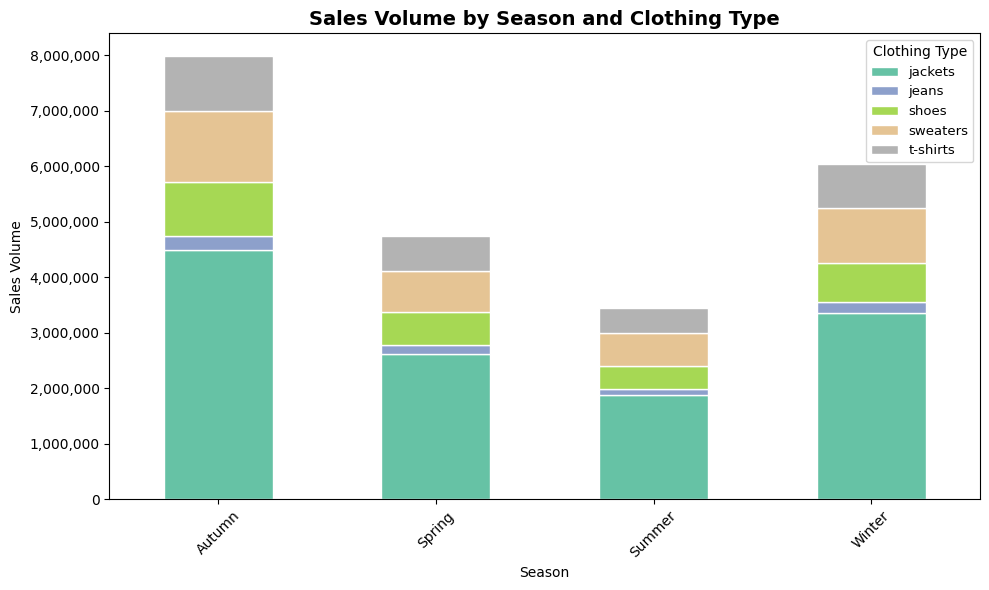

In [ ]:
# Stacked bar chart: Season vs Clothing Type
df_group = df.groupby(["season", "terms"]).agg({"sales_volume": "sum"})
df_pivot = df_group.unstack("terms")
df_pivot.columns = df_pivot.columns.droplevel(0)

ax = df_pivot.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="Set2", edgecolor="white")

plt.title("Sales Volume by Season and Clothing Type", fontsize=14, fontweight="bold")
plt.xlabel("Season")
plt.ylabel("Sales Volume")
plt.legend(title="Clothing Type", loc="upper right", fontsize=9.5)
ax.ticklabel_format(style='plain', axis='y')
ax.get_yaxis().set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3 points: info, reason, direction 
# include total sales

## 6. Material Correlation with Sales (Heatmap)

**Key Finding:**
- Heatmap reveals which materials perform best in each season
- Cotton, Polyester, and Wool Blend are top performers
- Seasonal material preferences are evident

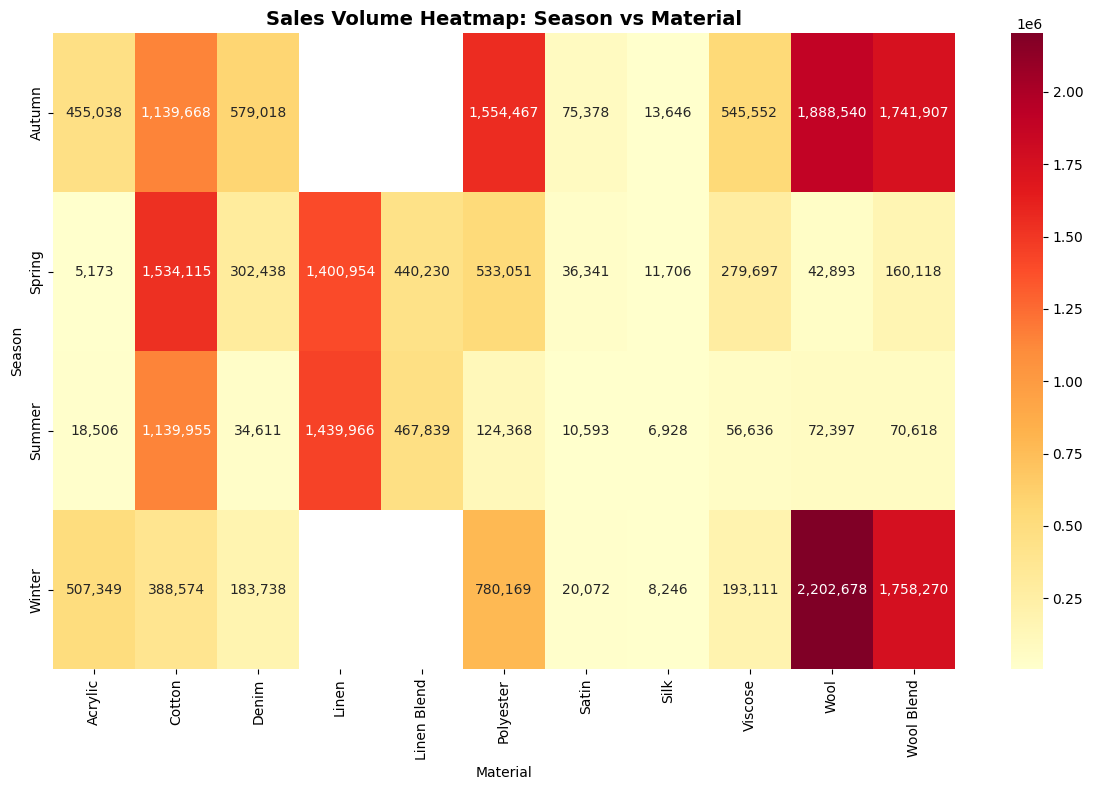

In [ ]:
# Heatmap: Season vs Material
df_pivot = df.groupby(["season", "material"]).agg({"sales_volume": "sum"}).unstack("material")
df_pivot.columns = df_pivot.columns.droplevel(0)

plt.figure(figsize=(12, 8))
sns.heatmap(df_pivot, annot=True, fmt=",.0f", cmap="YlOrRd")
plt.title("Sales Volume Heatmap: Season vs Material", fontsize=14, fontweight="bold")
plt.xlabel("Material")
plt.ylabel("Season")
plt.tight_layout()
plt.show()

# Question : based on material for same product, which one has better sales ?

## 7. Sales by Clothing Type & Material

**Key Finding:**
- Grouped bar chart shows which material performs best for each clothing type
- Clear material preferences vary by clothing category
- Some materials dominate specific clothing types (e.g., Cotton in shirts)

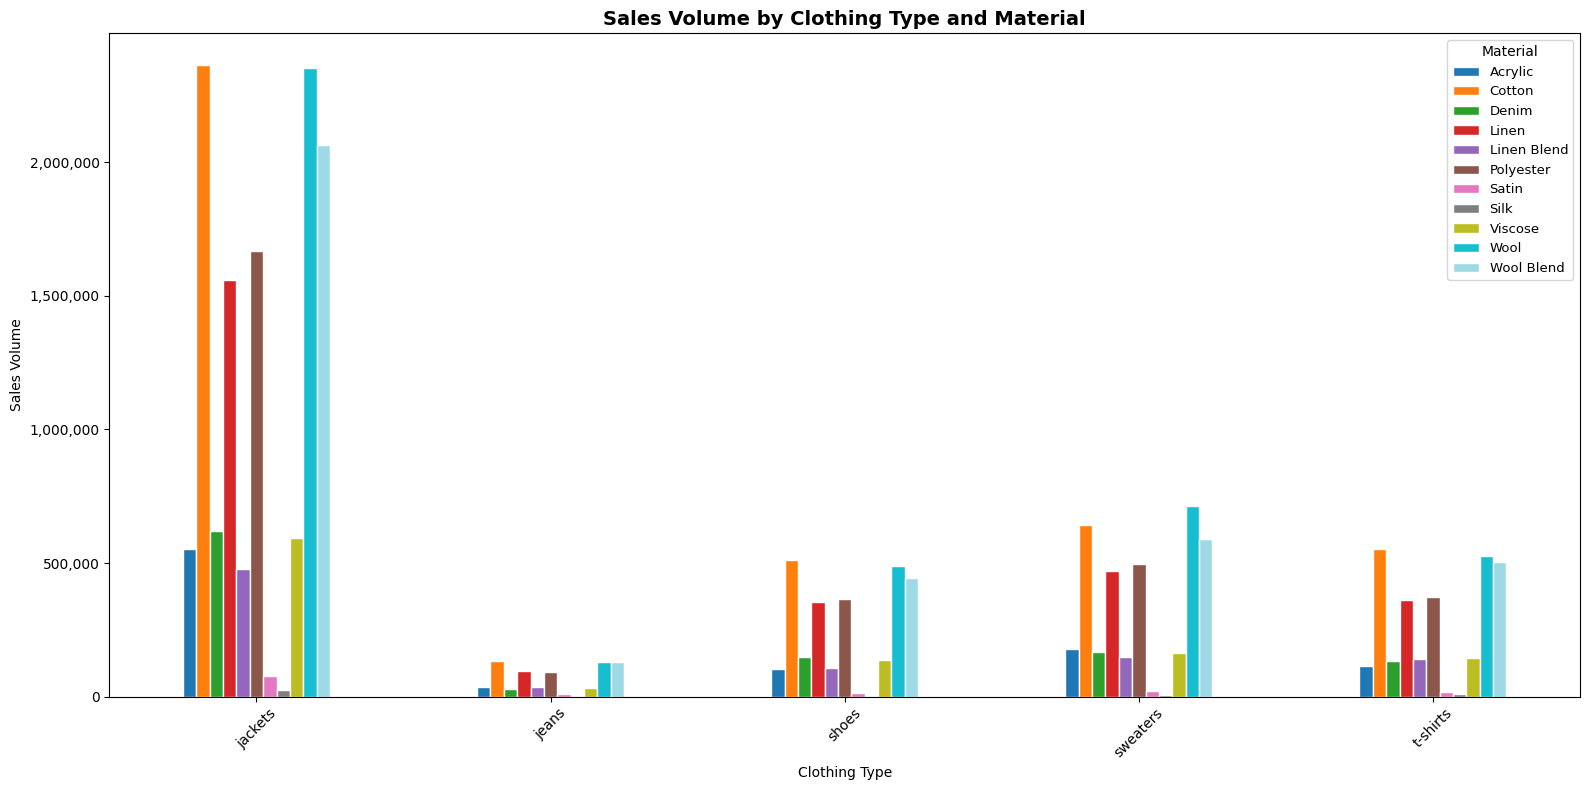

In [10]:
# Grouped bar chart: Clothing Type vs Material
df_group = df.groupby(["terms", "material"]).agg({"sales_volume": "sum"})
df_pivot = df_group.unstack("material")
df_pivot.columns = df_pivot.columns.droplevel(0)

ax = df_pivot.plot(kind="bar", stacked=False, figsize=(16, 8), colormap="tab20", edgecolor="white")

plt.title("Sales Volume by Clothing Type and Material", fontsize=14, fontweight="bold")
plt.xlabel("Clothing Type")
plt.ylabel("Sales Volume")
plt.legend(title="Material", loc="upper right", fontsize=9.5)
ax.ticklabel_format(style='plain', axis='y')
ax.get_yaxis().set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 8. Impact of Promotion on Price

**Key Finding:**
- Box plot compares price distribution with and without promotions
- Promoted items tend to be slightly lower priced (lower quartiles)


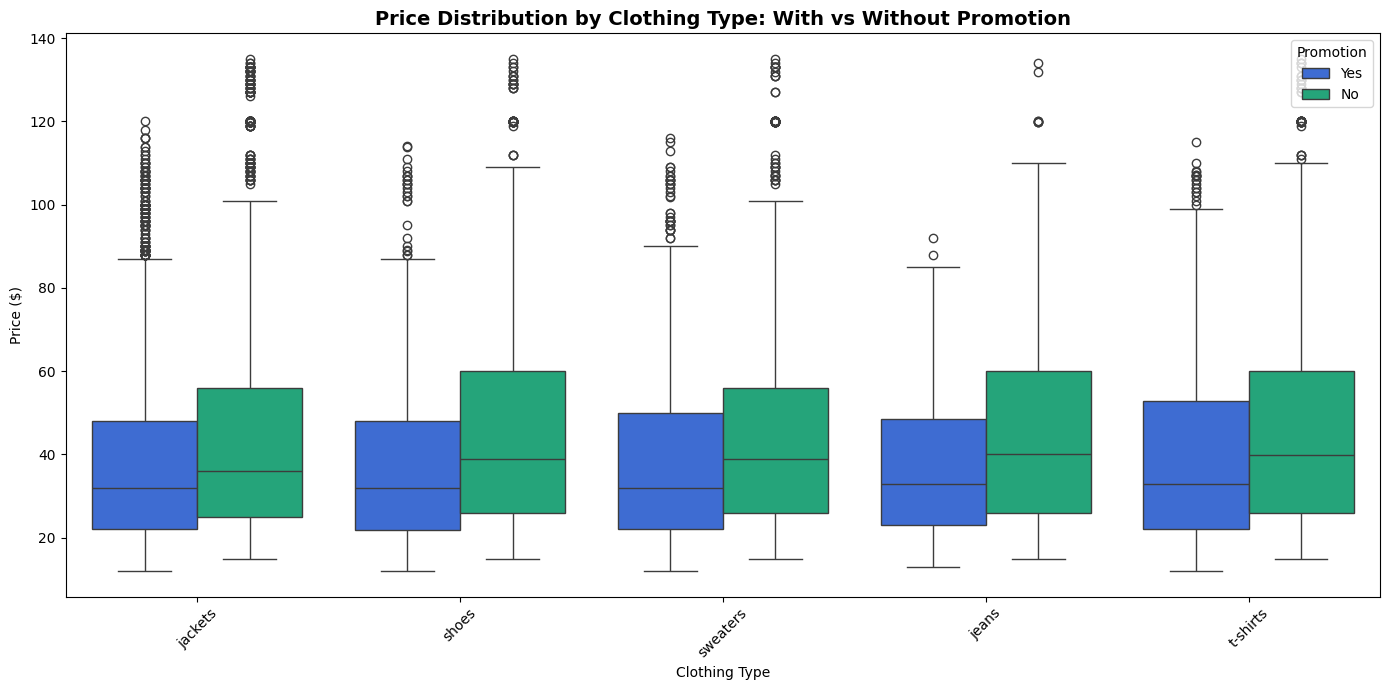

In [11]:
# Box plot: Price distribution with/without promotion
plt.figure(figsize=(14, 7))
sns.boxplot(data=df, x="terms", y="price", hue="promotion", palette=["#2563eb", "#10b981"])
plt.title("Price Distribution by Clothing Type: With vs Without Promotion", fontsize=14, fontweight="bold")
plt.xlabel("Clothing Type")
plt.ylabel("Price ($)")
plt.legend(title="Promotion", loc="upper right")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 9. Gender Analysis: Men vs Women Spending Habits

**Key Findings:**
- **Total Sales:** Women have more sales comparing to Men
- **By Clothing Type:** Different genders prefer different clothing categories
- **Premium Products (≥$80):** Women still have more sales comparing to Men

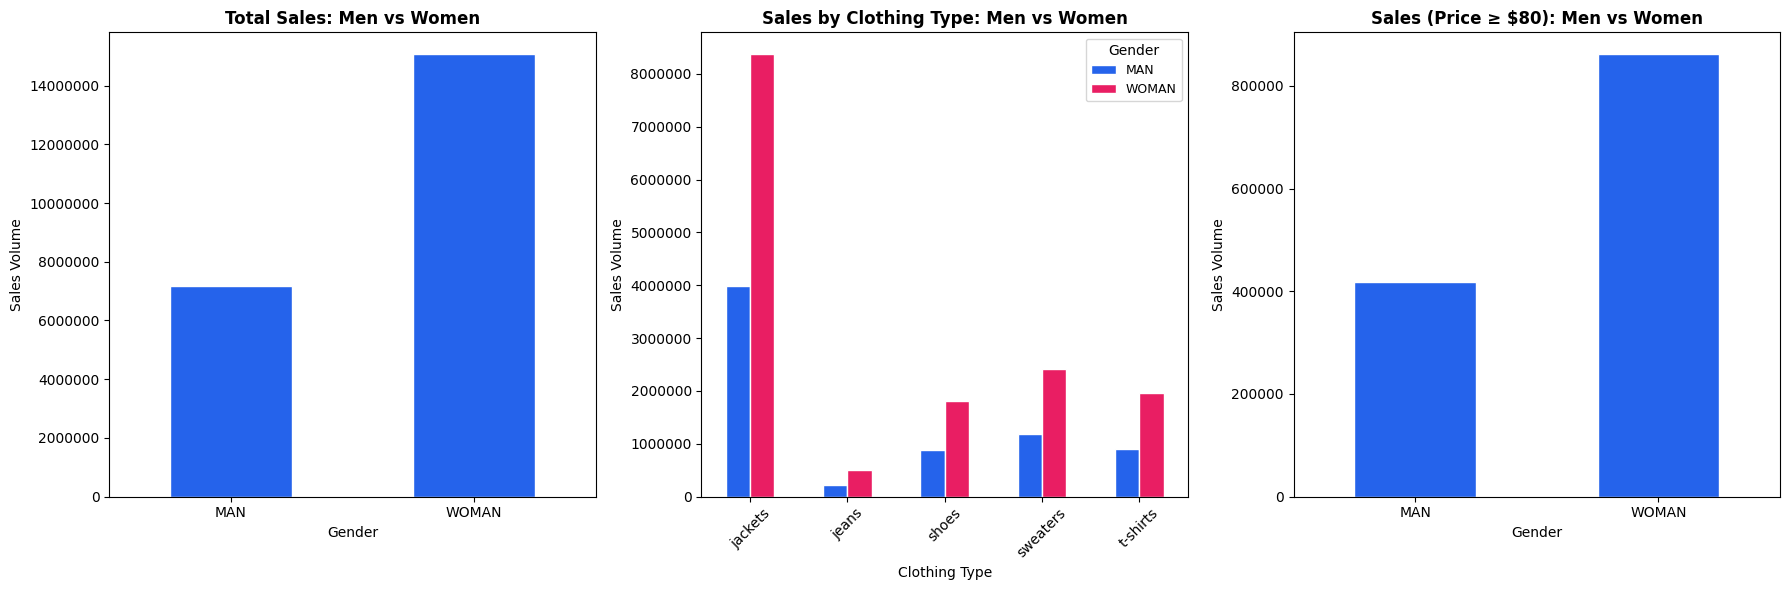

In [12]:
# Three-chart analysis: Men vs Women spending habits
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Chart 1: Total sales by gender
df_gender = df.groupby("section").agg({"sales_volume": "sum"})
df_gender.plot(kind="bar", ax=axes[0], color=["#2563eb", "#e91e63"], edgecolor="white", legend=False)
axes[0].set_title("Total Sales: Men vs Women", fontsize=12, fontweight="bold")
axes[0].set_xlabel("Gender")
axes[0].set_ylabel("Sales Volume")
axes[0].tick_params(axis='x', rotation=0)
axes[0].ticklabel_format(style='plain', axis='y')

# Chart 2: Sales by clothing type and gender
df_clothing = df.groupby(["terms", "section"]).agg({"sales_volume": "sum"}).unstack("section")
df_clothing.columns = df_clothing.columns.droplevel(0)
df_clothing.plot(kind="bar", ax=axes[1], color=["#2563eb", "#e91e63"], edgecolor="white")
axes[1].set_title("Sales by Clothing Type: Men vs Women", fontsize=12, fontweight="bold")
axes[1].set_xlabel("Clothing Type")
axes[1].set_ylabel("Sales Volume")
axes[1].legend(title="Gender", loc="upper right", fontsize=9)
axes[1].tick_params(axis='x', rotation=45)
axes[1].ticklabel_format(style='plain', axis='y')

# Chart 3: Premium products (price >= $80)
df_high_price = df[df["price"] >= 80].groupby("section").agg({"sales_volume": "sum"})
df_high_price.plot(kind="bar", ax=axes[2], color=["#2563eb", "#e91e63"], edgecolor="white", legend=False)
axes[2].set_title("Sales (Price ≥ $80): Men vs Women", fontsize=12, fontweight="bold")
axes[2].set_xlabel("Gender")
axes[2].set_ylabel("Sales Volume")
axes[2].tick_params(axis='x', rotation=0)
axes[2].ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

## Summary of Key Insights

1. **Price Sensitivity:** Negative correlation between price and sales volume
2. **Seasonal Patterns:** Clear seasonal variations in product demand
3. **Material Preferences:** Different materials perform better in different seasons
4. **Gender Differences:** Women tend to like shopping more
6. **Promotions:** Applied accross different categories